# dot calculation

By utilizing the structure of the Amat, we can compute the vector matrix product in a more efficient way.

In this notebook, we will check the faster way actually works and compare the performance with the naive way.


In [1]:
import time
import random

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from exputils.Amat.get import get_Amat
from exputils.dot.calc_dot import calc_dot
from exputils.dot.get_topK_Amat import get_topK_Amat
from exputils.stabilizer_group import total_stabilizer_group_size
from exputils.state.random_ket import make_random_quantum_state

n=3
[k|progress|range]: 1 | 1.20000e+02/1.08000e+03 | [0.01721, 0.87813] | 10[ms]
[k|progress|range]: 2 | 5.68000e+02/1.08000e+03 | [0.01721, 0.87813] | 16[ms]
[k|progress|range]: 3 | 1.08000e+03/1.08000e+03 | [0.01721, 0.87813] | 19[ms]
 calculation time : 19[ms]
t1-t0=0.00041028857231140137
t2-t1=0.2896824963390827
t3-t2=0.03652317076921463
Counter({8: 512, 4: 448, 2: 112, 1: 8})


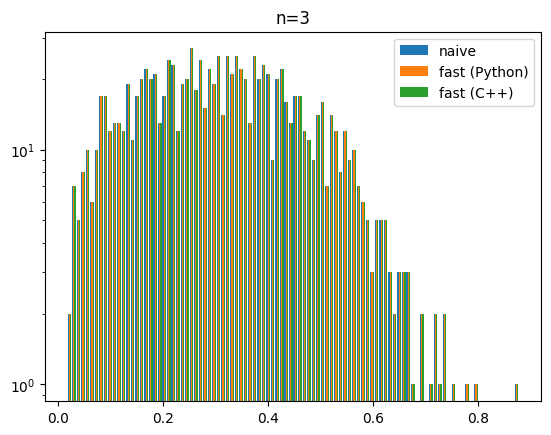

n=4
[k|progress|range]: 1 | 4.96000e+02/3.67200e+04 | [0.00646, 0.58428] | 19[ms]
[k|progress|range]: 2 | 4.97600e+03/3.67200e+04 | [0.00248, 0.66150] | 28[ms]
[k|progress|range]: 3 | 2.03360e+04/3.67200e+04 | [0.21602, 0.69257] | 33[ms]
[k|progress|range]: 4 | 3.67200e+04/3.67200e+04 | [0.21602, 0.69257] | 37[ms]
 calculation time : 38[ms]
t1-t0=0.0006553679704666138
t2-t1=0.08058033883571625
t3-t2=0.12247662246227264
Counter({16: 4459, 8: 4166, 4: 1241, 2: 129, 1: 5})


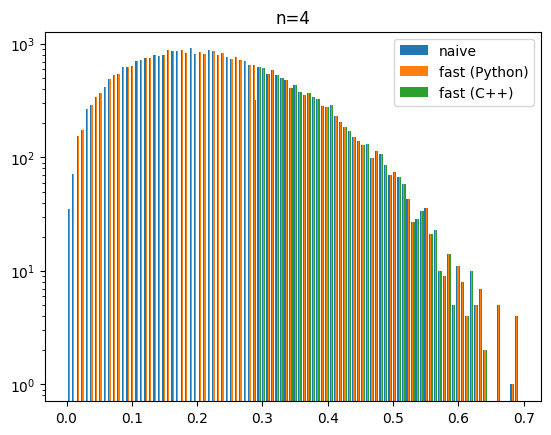

n=5
[k|progress|range]: 1 | 2.01600e+03/2.42352e+06 | [0.00392, 0.39928] | 14[ms]
[k|progress|range]: 2 | 4.16960e+04/2.42352e+06 | [0.00530, 0.49106] | 19[ms]
[k|progress|range]: 3 | 3.59136e+05/2.42352e+06 | [0.32731, 0.57949] | 25[ms]
[k|progress|range]: 4 | 1.37494e+06/2.42352e+06 | [0.38172, 0.59642] | 30[ms]
[k|progress|range]: 5 | 2.42352e+06/2.42352e+06 | [0.38172, 0.59912] | 40[ms]
 calculation time : 41[ms]
t1-t0=0.057343948632478714
t2-t1=2.133357774466276
t3-t2=0.1616501584649086
Counter({32: 4564, 16: 4230, 8: 1127, 4: 79})


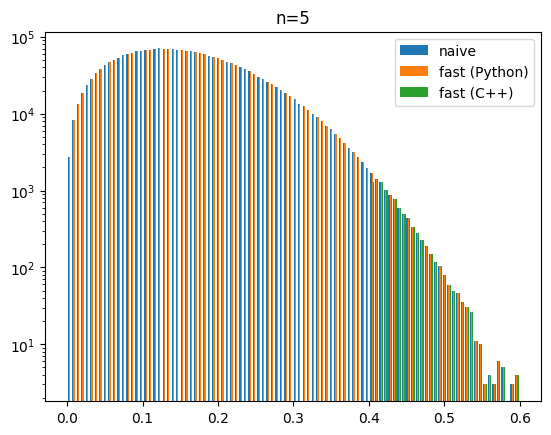

n=3
[k|progress|range]: 1 | 1.20000e+02/1.08000e+03 | [0.00823, 0.41719] | 10[ms]
[k|progress|range]: 2 | 5.68000e+02/1.08000e+03 | [0.00399, 0.43422] | 15[ms]
[k|progress|range]: 3 | 1.08000e+03/1.08000e+03 | [0.00095, 0.43422] | 20[ms]
 calculation time : 20[ms]
t1-t0=0.0002766549587249756
t2-t1=0.003234453499317169
t3-t2=0.027995336800813675
Counter({4: 112, 8: 64, 2: 56, 1: 8})


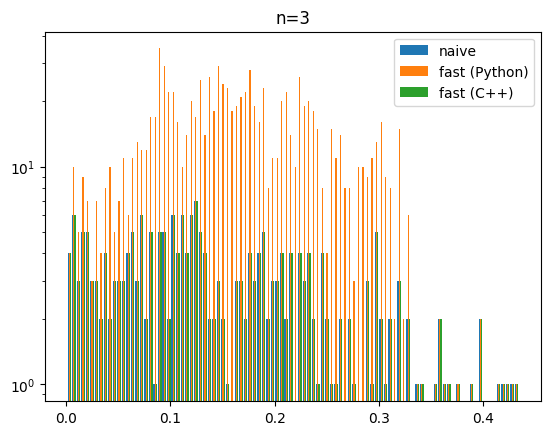

n=4
[k|progress|range]: 1 | 4.96000e+02/3.67200e+04 | [0.00031, 0.40982] | 16[ms]
[k|progress|range]: 2 | 4.97600e+03/3.67200e+04 | [0.00006, 0.46450] | 21[ms]
[k|progress|range]: 3 | 2.03360e+04/3.67200e+04 | [0.00001, 0.47611] | 26[ms]
[k|progress|range]: 4 | 3.67200e+04/3.67200e+04 | [0.00001, 0.48126] | 30[ms]
 calculation time : 30[ms]
t1-t0=0.000525742769241333
t2-t1=0.09168175235390663
t3-t2=0.06108175590634346
Counter({8: 1920, 4: 1120, 16: 1024, 2: 240, 1: 16})


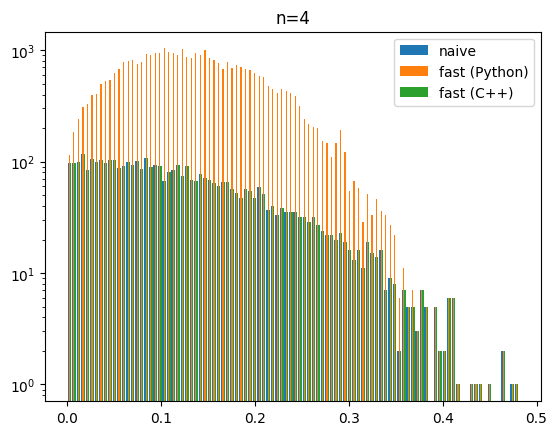

n=5
[k|progress|range]: 1 | 2.01600e+03/2.42352e+06 | [0.00016, 0.35096] | 15[ms]
[k|progress|range]: 2 | 4.16960e+04/2.42352e+06 | [0.00001, 0.42167] | 18[ms]
[k|progress|range]: 3 | 3.59136e+05/2.42352e+06 | [0.00007, 0.44050] | 28[ms]
[k|progress|range]: 4 | 1.37494e+06/2.42352e+06 | [0.12069, 0.47771] | 32[ms]
[k|progress|range]: 5 | 2.42352e+06/2.42352e+06 | [0.21200, 0.47771] | 37[ms]
 calculation time : 37[ms]
t1-t0=0.003215290606021881
t2-t1=1.9865260533988476
t3-t2=0.1384464092552662
Counter({16: 4319, 8: 2710, 32: 2225, 4: 679, 2: 65, 1: 2})


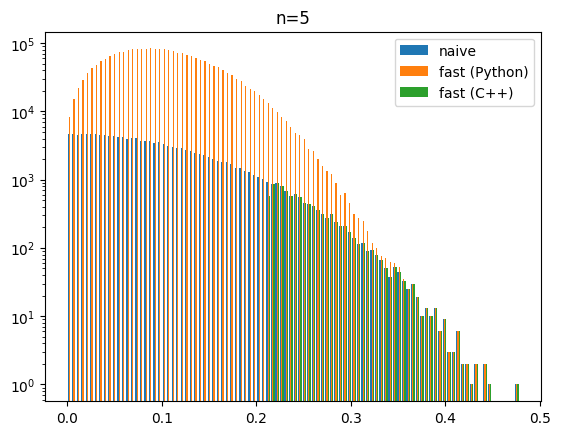

In [2]:
# g++ exputils/cpp/calc_dot.cpp -o exputils/cpp/calc_dot.exe -std=c++17 -O2 -mtune=native -march=native -fopenmp -lz

for is_real_mode in [False, True]:
    for n in [3, 4, 5]:
        print(f"{n=}")

        random.seed(0)
        psi = make_random_quantum_state("pure", n, seed=0)
        if is_real_mode:
            psi.imag = 0

        Amat = get_Amat(n)
        if is_real_mode:
            Amat = Amat[:, np.abs(Amat.imag).sum(axis=0) == 0]
        t0 = time.perf_counter()
        ansSlow = np.array(psi).conj() @ Amat
        t1 = time.perf_counter()
        ansFast = calc_dot(n, psi.tolist())
        t2 = time.perf_counter()
        states = get_topK_Amat(n, psi, K=10000, is_dual_mode=False, verbose=True)
        ansFast2 = np.abs(psi.conjugate() @ states)
        t3 = time.perf_counter()
        print(f"{t1-t0=}")
        print(f"{t2-t1=}")
        print(f"{t3-t2=}")
        print(Counter(np.count_nonzero(states.toarray(), axis=0)))

        plt.hist([np.abs(ansSlow), np.abs(ansFast), np.abs(ansFast2)], bins=100)
        plt.title(f"n={n}")
        plt.legend(["naive", "fast (Python)", "fast (C++)"])
        plt.yscale("log")
        plt.show()

        if not is_real_mode:
            assert len(ansSlow) == len(ansFast)
            assert np.allclose(np.sort(ansSlow), np.sort(ansFast))

n=6 total_stabilizer_group_size(n)=315057600
psi[:10]=array([ 0.00191592-0.055118j  ,  0.05823157+0.03303339j,
       -0.0873583 -0.00839837j, -0.042261  -0.06658054j,
       -0.04508918-0.03069197j, -0.05638643-0.08410659j,
        0.0249202 +0.0817603j , -0.03569263-0.11142187j,
        0.14494395-0.06691227j, -0.09171176+0.03051833j])
[k|progress|range]: 1 | 8.12800e+03/3.15058e+08 | [0.00058, 0.36886] | 18[ms]
[k|progress|range]: 2 | 3.41440e+05/3.15058e+08 | [0.19239, 0.44131] | 32[ms]
[k|progress|range]: 3 | 6.05536e+06/3.15058e+08 | [0.21824, 0.47986] | 49[ms]
[k|progress|range]: 4 | 4.87193e+07/3.15058e+08 | [0.31513, 0.48983] | 65[ms]
[k|progress|range]: 5 | 1.80840e+08/3.15058e+08 | [0.35789, 0.53119] | 87[ms]
[k|progress|range]: 6 | 3.15058e+08/3.15058e+08 | [0.35789, 0.53119] | 197[ms]
 calculation time : 199[ms]
t1-t0=0.3828160911798477
Counter({32: 4200, 64: 3830, 16: 1646, 8: 300, 4: 24})


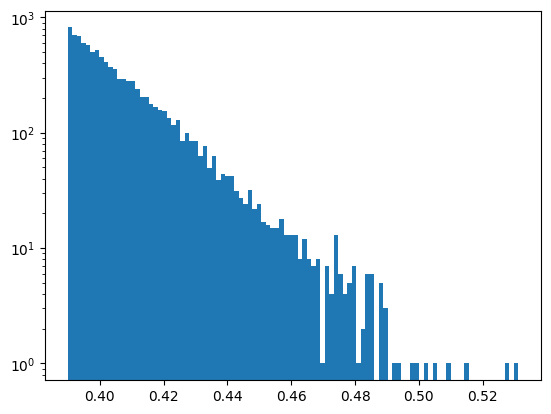

n=6 total_stabilizer_group_size(n)=315057600
psi[:10]=array([-0.08404809+0.j,  0.05704265+0.j,  0.06060005+0.j, -0.09120411+0.j,
        0.15088636+0.j, -0.13175457+0.j,  0.13116379+0.j, -0.09441899+0.j,
       -0.10907312+0.j, -0.1305313 +0.j])
[k|progress|range]: 1 | 8.12800e+03/3.15058e+08 | [0.00004, 0.28622] | 11[ms]
[k|progress|range]: 2 | 3.41440e+05/3.15058e+08 | [0.00362, 0.38628] | 21[ms]
[k|progress|range]: 3 | 6.05536e+06/3.15058e+08 | [0.25283, 0.49726] | 27[ms]
[k|progress|range]: 4 | 4.87193e+07/3.15058e+08 | [0.32926, 0.56380] | 33[ms]
[k|progress|range]: 5 | 1.80840e+08/3.15058e+08 | [0.37409, 0.61482] | 38[ms]
[k|progress|range]: 6 | 3.15058e+08/3.15058e+08 | [0.37409, 0.61482] | 44[ms]
 calculation time : 44[ms]
t1-t0=0.17275134474039078
Counter({32: 4578, 64: 2562, 16: 2472, 8: 388})


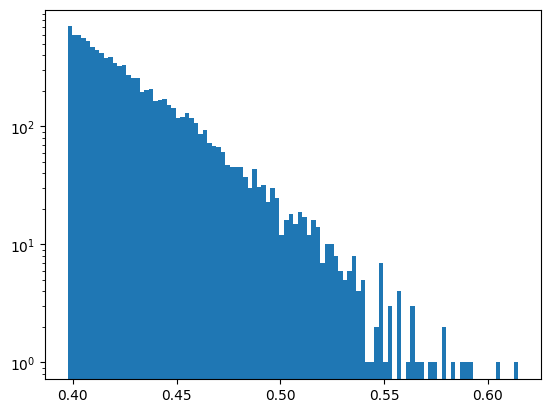

n=7 total_stabilizer_group_size(n)=81284860800
psi[:10]=array([ 0.07913827+0.06814959j,  0.00593093+0.01811256j,
        0.05109879-0.00323261j,  0.02199331-0.00808749j,
       -0.08410508-0.00334621j,  0.05044391-0.01531157j,
       -0.05669442+0.08172552j, -0.01057939-0.05585817j,
        0.14989151-0.01841798j, -0.10853592+0.06166335j])
[k|progress|range]: 1 | 3.26400e+04/8.12849e+10 | [0.00169, 0.30373] | 44[ms]
[k|progress|range]: 2 | 2.76365e+06/8.12849e+10 | [0.09433, 0.34968] | 75[ms]
[k|progress|range]: 3 | 9.95194e+07/8.12849e+10 | [0.20205, 0.37190] | 105[ms]
[k|progress|range]: 4 | 1.64761e+09/8.12849e+10 | [0.28543, 0.41110] | 144[ms]
[k|progress|range]: 5 | 1.28338e+10/8.12849e+10 | [0.31062, 0.41110] | 237[ms]
[k|progress|range]: 6 | 4.69251e+10/8.12849e+10 | [0.33133, 0.41908] | 420[ms]
[k|progress|range]: 7 | 8.12849e+10/8.12849e+10 | [0.33133, 0.41908] | 569[ms]
 calculation time : 570[ms]
t1-t0=0.9398361295461655
Counter({64: 4239, 128: 4052, 32: 1480, 16: 219, 8: 9,

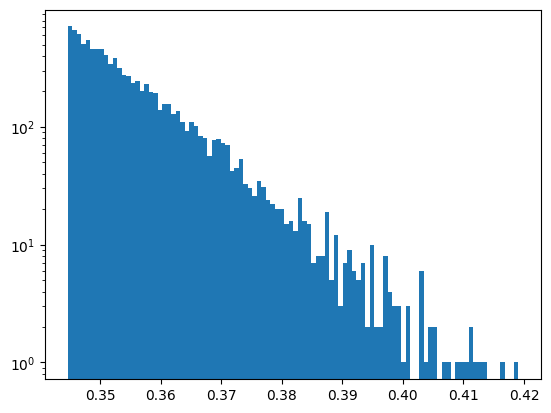

n=7 total_stabilizer_group_size(n)=81284860800
psi[:10]=array([ 0.04174046+0.j,  0.0767127 +0.j, -0.13656051+0.j, -0.05825485+0.j,
       -0.12444521+0.j,  0.01832281+0.j,  0.02939802+0.j,  0.03720062+0.j,
       -0.11412428+0.j, -0.14166062+0.j])
[k|progress|range]: 1 | 3.26400e+04/8.12849e+10 | [0.00000, 0.22101] | 13[ms]
[k|progress|range]: 2 | 2.76365e+06/8.12849e+10 | [0.00022, 0.30008] | 26[ms]
[k|progress|range]: 3 | 9.95194e+07/8.12849e+10 | [0.25870, 0.39643] | 43[ms]
[k|progress|range]: 4 | 1.64761e+09/8.12849e+10 | [0.31336, 0.45542] | 53[ms]
[k|progress|range]: 5 | 1.28338e+10/8.12849e+10 | [0.33809, 0.48471] | 63[ms]
[k|progress|range]: 6 | 4.69251e+10/8.12849e+10 | [0.36175, 0.50286] | 71[ms]
[k|progress|range]: 7 | 8.12849e+10/8.12849e+10 | [0.36175, 0.50639] | 76[ms]
 calculation time : 77[ms]
t1-t0=0.3994140811264515
Counter({64: 4694, 128: 2706, 32: 2296, 16: 302, 8: 2})


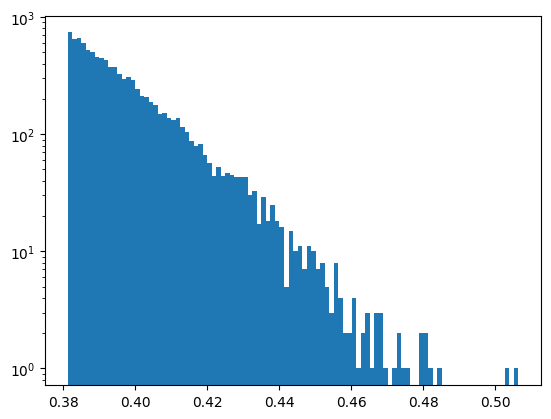

n=8 total_stabilizer_group_size(n)=41780418451200
psi[:10]=array([-0.02468419-0.01300555j, -0.04743796-0.01841991j,
       -0.04517999+0.00046806j, -0.03190195-0.05473635j,
        0.03236416-0.00138037j,  0.00424968-0.07011695j,
        0.0580995 -0.01847172j,  0.07891767-0.06241548j,
        0.08388194+0.01988365j,  0.03656884+0.02063767j])
[k|progress|range]: 1 | 1.30816e+05/4.17804e+13 | [0.08513, 0.20786] | 47[ms]
[k|progress|range]: 2 | 2.22390e+07/4.17804e+13 | [0.14642, 0.26887] | 84[ms]
[k|progress|range]: 3 | 1.61403e+09/4.17804e+13 | [0.21196, 0.29796] | 148[ms]
[k|progress|range]: 4 | 5.42491e+10/4.17804e+13 | [0.24375, 0.31185] | 395[ms]
[k|progress|range]: 5 | 8.69244e+11/4.17804e+13 | [0.25904, 0.32884] | 1755[ms]
[k|progress|range]: 6 | 6.66477e+12/4.17804e+13 | [0.27386, 0.33431] | 7371[ms]
[k|progress|range]: 7 | 2.41882e+13/4.17804e+13 | [0.27854, 0.33431] | 23143[ms]
[k|progress|range]: 8 | 4.17804e+13/4.17804e+13 | [0.28301, 0.34005] | 35567[ms]
 calculation time :

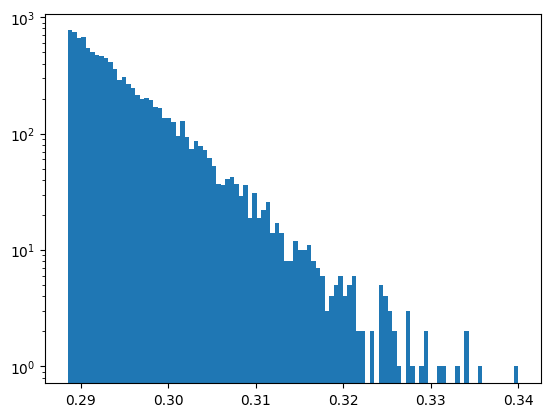

n=8 total_stabilizer_group_size(n)=41780418451200
psi[:10]=array([-0.03736756+0.j,  0.02218857+0.j, -0.01669497+0.j,  0.09499975+0.j,
       -0.06381845+0.j, -0.05826005+0.j, -0.02336721+0.j, -0.09800908+0.j,
       -0.01364136+0.j,  0.07097808+0.j])
[k|progress|range]: 1 | 1.30816e+05/4.17804e+13 | [0.07118, 0.14341] | 16[ms]
[k|progress|range]: 2 | 2.22390e+07/4.17804e+13 | [0.15858, 0.20247] | 29[ms]
[k|progress|range]: 3 | 1.61403e+09/4.17804e+13 | [0.21562, 0.27456] | 71[ms]
[k|progress|range]: 4 | 5.42491e+10/4.17804e+13 | [0.26007, 0.34034] | 140[ms]
[k|progress|range]: 5 | 8.69244e+11/4.17804e+13 | [0.28916, 0.39148] | 238[ms]
[k|progress|range]: 6 | 6.66477e+12/4.17804e+13 | [0.31123, 0.41109] | 334[ms]
[k|progress|range]: 7 | 2.41882e+13/4.17804e+13 | [0.32639, 0.42567] | 532[ms]
[k|progress|range]: 8 | 4.17804e+13/4.17804e+13 | [0.32639, 0.42669] | 566[ms]
 calculation time : 567[ms]
t1-t0=2.8652732148766518
Counter({128: 4730, 256: 2939, 64: 2102, 32: 228, 16: 1})


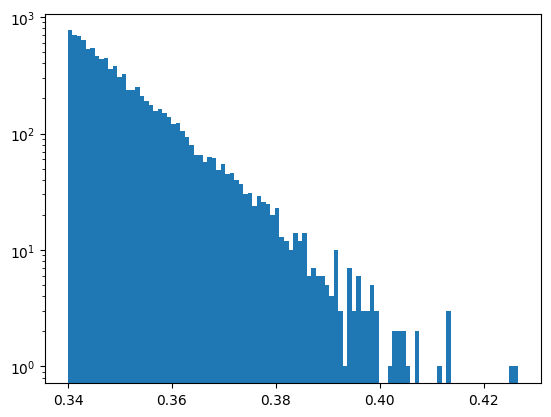

In [3]:
for n in [6, 7, 8]:
    for kind in ["pure", "real"]:
        print(f"{n=} {total_stabilizer_group_size(n)=}")

        random.seed(0)
        psi = make_random_quantum_state(kind, n, seed=0)
        print(f"{psi[:10]=}")

        t0 = time.perf_counter()
        states = get_topK_Amat(n, psi, K=10000, is_dual_mode=False, verbose=True)
        ans = np.abs(psi.conj().T @ states)
        t1 = time.perf_counter()
        print(f"{t1-t0=}")
        print(Counter(np.count_nonzero(states.toarray(), axis=0)))

        if n <= 5:
            ansSlow = np.abs(calc_dot(n, psi.tolist()))
            plt.hist([ans, ansSlow], bins=100)
        else:
            plt.hist(ans, bins=100)
        plt.yscale("log")
        plt.show()

In [4]:
def fidelity_for_data(n: int):
    seed = 0
    kind = "pure"
    print(f"{n=}")
    psi = make_random_quantum_state(kind, n, seed)
    t0 = time.perf_counter()
    Amat = get_topK_Amat(n, psi, is_dual_mode=False, K=1, verbose=True)
    t1 = time.perf_counter()
    print(f"{Amat.conjugate().T @ psi=}")

    with open(f"../data/fidelity/{kind}_{n}_time.txt", mode="w") as f:
        print(t1 - t0, file=f)


for n in [6, 7, 8, 9]:
    fidelity_for_data(n)

n=6
[k|progress|range]: 1 | 8.12800e+03/3.15058e+08 | [0.36468, 0.36886] | 15[ms]
[k|progress|range]: 2 | 3.41440e+05/3.15058e+08 | [0.44131, 0.44131] | 22[ms]
[k|progress|range]: 3 | 6.05536e+06/3.15058e+08 | [0.46058, 0.47986] | 25[ms]
[k|progress|range]: 4 | 4.87193e+07/3.15058e+08 | [0.48396, 0.48983] | 32[ms]
[k|progress|range]: 5 | 1.80840e+08/3.15058e+08 | [0.53119, 0.53119] | 37[ms]
[k|progress|range]: 6 | 3.15058e+08/3.15058e+08 | [0.52823, 0.53119] | 46[ms]
 calculation time : 46[ms]
Amat.conjugate().T @ psi=array([-0.23240368-0.47765499j])
n=7
[k|progress|range]: 1 | 3.26400e+04/8.12849e+10 | [0.26368, 0.30373] | 18[ms]
[k|progress|range]: 2 | 2.76365e+06/8.12849e+10 | [0.34968, 0.34968] | 38[ms]
[k|progress|range]: 3 | 9.95194e+07/8.12849e+10 | [0.37190, 0.37190] | 64[ms]
[k|progress|range]: 4 | 1.64761e+09/8.12849e+10 | [0.41110, 0.41110] | 89[ms]
[k|progress|range]: 5 | 1.28338e+10/8.12849e+10 | [0.41110, 0.41110] | 115[ms]
[k|progress|range]: 6 | 4.69251e+10/8.12849e+10 